JSON Data Loaded:
    id        date  sales region     category
0   1  2024-01-01   1500  North  Electronics
1   2  2024-01-02   1700  South     Clothing
2   3  2024-01-03   2000   East    Furniture
3   4  2024-01-04   2200   West  Electronics
4   5  2024-01-05   2500  North     Clothing
CSV Data Loaded:
      id,date,sales,region,product_type id,date,sales,region,store_location
0  1,2024-03-01,1500,North,Smartphones                                 NaN
1      2,2024-03-02,1700,South,Tablets                                 NaN
2       3,2024-03-03,1900,East,Laptops                                 NaN
3   4,2024-03-04,2100,West,Smartphones                                 NaN
4      5,2024-03-05,2300,North,Tablets                                 NaN
XML Data Loaded:
   id        date sales region   promotion
0  1  2024-05-01  1500  North  Discount A
1  2  2024-05-02  1600  South  Discount B
2  3  2024-05-03  1700   East  Discount C
3  4  2024-05-04  1800   West  Discount D
4  5  2024-05-0

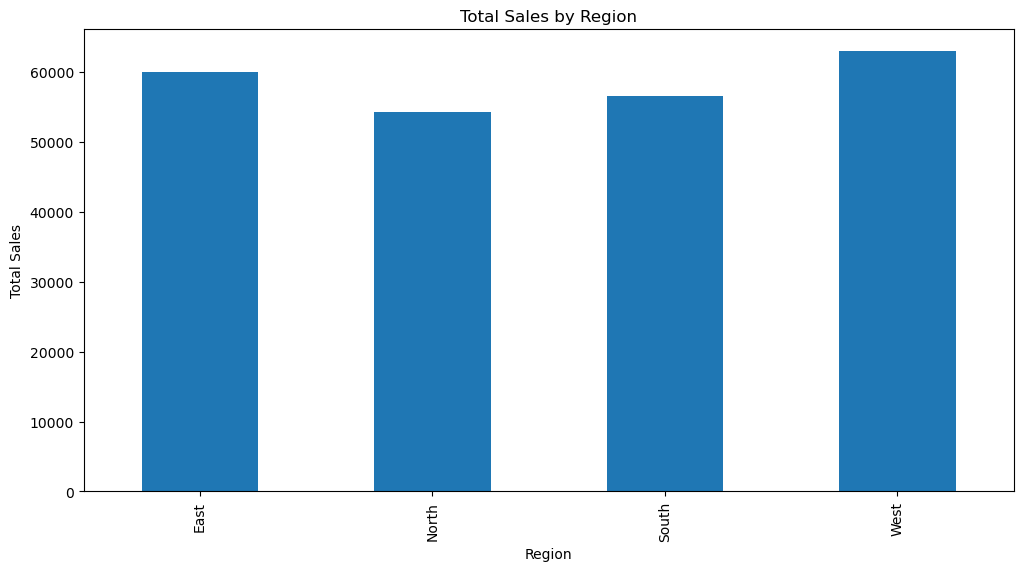

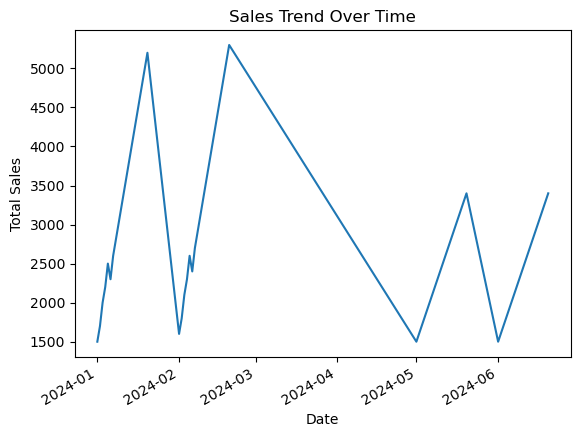

Mean Absolute Error: 521.9965721790213


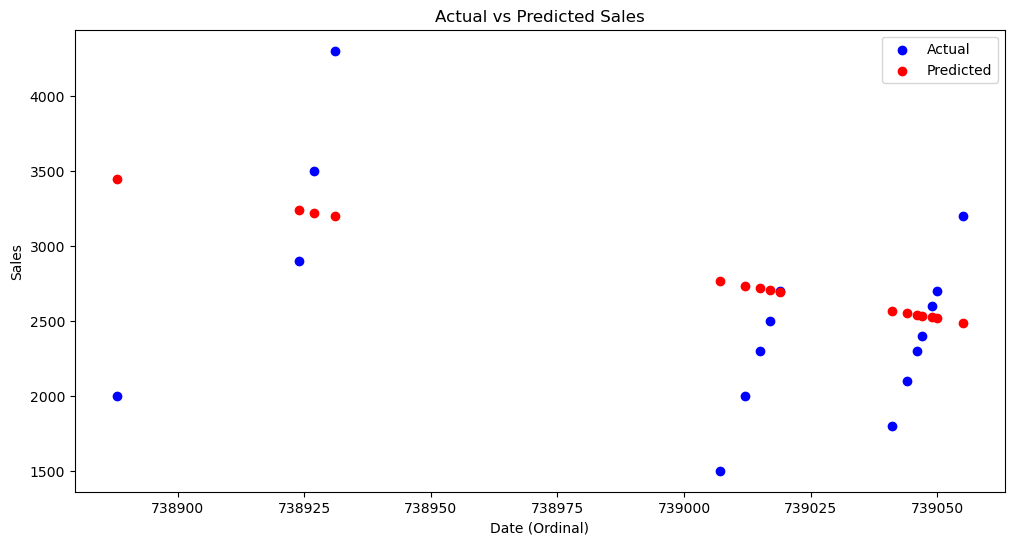

In [1]:
# Import necessary libraries
import pandas as pd  # pandas: library for data manipulation and analysis
import matplotlib.pyplot as plt  # matplotlib: library for creating visualizations
from sklearn.model_selection import train_test_split  # scikit-learn: function to split data into training and testing sets
from sklearn.linear_model import LinearRegression  # scikit-learn: class for linear regression model
from sklearn.metrics import mean_absolute_error  # scikit-learn: function to evaluate model performance
import xml.etree.ElementTree as ET  # xml.etree.ElementTree: module for parsing XML data
import json  # json: library for handling JSON data
import requests  # requests: library for making HTTP requests to APIs

#Step 1: Data Extraction
# Define file paths (replace these with your actual file paths)
json_files = ['j1.json', 'j2.json']
csv_files = ['c1.csv', 'c2.csv']
xml_files = ['x1.xml', 'x2.xml']

# Function to load JSON data from multiple files
def load_json_data(files):
    df_list = []  # List to hold DataFrames from each JSON file
    for file in files:  # Loop through each JSON file
        with open(file, 'r') as f:  # Open the file in read mode Each file is opened in read mode ('r'). The with statement ensures the file is properly closed after reading.
            data = json.load(f)  # Load JSON data into a Python object
            df_list.append(pd.DataFrame(data))  # Convert JSON data to DataFrame and append to list.The DataFrame created from each JSON file is appended to the df_list.
    result = pd.concat(df_list, ignore_index=True)  # Concatenate all DataFrames into a single DataFrame
    print("JSON Data Loaded:\n", result.head())  # Print the first few rows of the result
    return result

# Load JSON data  
json_df = load_json_data(json_files)  

# Function to load CSV data from multiple files  
def load_csv_data(files):  #CSV files are already structured in a way that pandas can easily interpret, no need extra step like JSON
    df_list = [pd.read_csv(file) for file in files]  # Read each CSV file into a DataFrame and store in list
    result = pd.concat(df_list, ignore_index=True)  # Concatenate all DataFrames into a single DataFrame
    print("CSV Data Loaded:\n", result.head())  # Print the first few rows of the result
    return result  

# Load CSV data  
csv_df = load_csv_data(csv_files)

# Function to load XML data from multiple files
def load_xml_data(files):
    df_list = []  # List to hold DataFrames from each XML file
    for file in files:  # Loop through each XML file
        tree = ET.parse(file)  # Parse the XML file into an ElementTree
        root = tree.getroot()  # Get the root element of the XML tree
        data = []  # List to hold data extracted from XML
        for entry in root.findall('entry'):  # Loop through each 'entry' element in XML
            data.append({
                'id': entry.find('id').text,  # Extract data from XML elements
                'date': entry.find('date').text, #By writing out each field name, you are specifying exactly which parts of 
                'sales': entry.find('sales').text, #the XML structure should be extracted and how they should be mapped to the columns in your DataFrame
                'region': entry.find('region').text, #you must explicitly reference these tags.
                'promotion': entry.find('promotion').text # entry.find('id').text This explicitly extracts the text content of the <id> element within each <entry>.
            })
        df_list.append(pd.DataFrame(data))  # Convert extracted data to DataFrame and append to list  This dictionary construction maps each XML element to a specific column in the DataFrame
    result = pd.concat(df_list, ignore_index=True)  # Concatenate all DataFrames into a single DataFrame
    print("XML Data Loaded:\n", result.head())  # Print the first few rows of the result
    return result

# Load XML data
xml_df = load_xml_data(xml_files)

#Step 2: Data Transformation

# Function to transform and combine all data
def transform_data(json_df, csv_df, xml_df):
    # Combine all DataFrames into one
    combined_df = pd.concat([json_df, csv_df, xml_df], ignore_index=True)
    
    # Convert 'date' column to datetime format
    #directly updating the date column of the combined_df DataFrame with the new, converted values. 
    #This is a common practice in pandas because it allows you to modify the DataFrame in place
    combined_df['date'] = pd.to_datetime(combined_df['date'], errors='coerce')
    
    # Convert 'sales' to numeric, force errors to NaN, then fill NaN with 0
    combined_df['sales'] = pd.to_numeric(combined_df['sales'], errors='coerce').fillna(0)
    #Handling Errors: The errors='coerce' parameter tells pandas to convert any invalid date entries 
    #to NaT (Not a Time) instead of throwing an error
    
    # Fill missing values with zero
#{'promotion': False}:
#This is a dictionary used to specify the fill value for each column with missing data.
#Dictionary {}: The dictionary {} allows you to specify which columns to fill and what values to use for filling.
    
    combined_df.fillna({'promotion': False}, inplace=True)
    
    
    print("Transformed Data:\n", combined_df.head())  # Print the first few rows of the transformed data
    return combined_df  # Return the transformed DataFrame

# Transform and combine data
combined_df = transform_data(json_df, csv_df, xml_df)

#Step 3: Data Visualization
# Function to visualize data
def visualize_data(df):
    plt.figure(figsize=(12, 6))  # Set the size of the figure for plots
    
    # Plot total sales by region
    df.groupby('region')['sales'].sum().plot(kind='bar')
    plt.title('Total Sales by Region')  # Set the title of the plot
    plt.xlabel('Region')  # Set the label for the x-axis
    plt.ylabel('Total Sales')  # Set the label for the y-axis
    plt.show()  # Display the plot
    
    # Plot sales trend over time
    df.groupby('date')['sales'].sum().plot(kind='line')
    plt.title('Sales Trend Over Time')  # Set the title of the plot
    plt.xlabel('Date')  # Set the label for the x-axis
    plt.ylabel('Total Sales')  # Set the label for the y-axis
    plt.show()  # Display the plot

# Visualize data
visualize_data(combined_df)

#Step 4: Predictive Modeling

# Function to apply predictive modeling
def predictive_model(df):
    df = df[['date', 'sales']].dropna()  # Keep only 'date' and 'sales' columns, drop rows with missing values
    df['date_ordinal'] = df['date'].apply(lambda x: x.toordinal())  # Making new column date_ordinal and Convert dates to ordinal (numeric) format
    
    X = df[['date_ordinal']]  # Feature: numeric representation of the date
    y = df['sales']  # Target variable: sales
    
    # Split data into training and testing sets
#train_test_split(): Splits data into training and testing sets.
#test_size=0.2: Uses 20% of the data for testing and 80% for training.
#random_state=0: Ensures reproducibility of the data split.
#This split is crucial for evaluating the performance of your model and ensuring it can generalize well to new data

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#The train_test_split() function splits the original dataset into these four subsets so that you can train your model on 
#one part and evaluate its performance on another, ensuring you test the model's ability to generalize to new data
#assigns the results of the train_test_split() function to four variables. 
    
    
    model = LinearRegression()  # Initialize linear regression model
    
    model.fit(X_train, y_train)  # Train the model on the training data
    
    predictions = model.predict(X_test)  # Make predictions on the test data
    
#This sequence of operations is a standard workflow in machine learning where you train a model on training data and then use it to
#make predictions on test data to evaluate its performance.
    
    # Calculate and print Mean Absolute Error
    mae = mean_absolute_error(y_test, predictions)
    print(f"Mean Absolute Error: {mae}")
    
    # Plot actual vs. predicted sales
    plt.figure(figsize=(12, 6))
    plt.scatter(X_test, y_test, color='blue', label='Actual')  # Plot actual sales
    plt.scatter(X_test, predictions, color='red', label='Predicted')  # Plot predicted sales
    plt.title('Actual vs Predicted Sales')  # Set the title of the plot
    plt.xlabel('Date (Ordinal)')  # Set the label for the x-axis
    plt.ylabel('Sales')  # Set the label for the y-axis
    plt.legend()  # Show legend
    plt.show()  # Display the plot

# Apply predictive modeling
predictive_model(combined_df)

